<a href="https://colab.research.google.com/github/finardi/WatSpeed_LLM_foundation/blob/main/Solution_Module_1_Using_T5_for_sentence_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1 - Using T5 for sentence classification

This notebook presents an example of how to use a fine-tuned T5 model to perform sentiment analysis. Sentiment analysis, also referred to as opinion mining, is a type of text classification task in Natural Language Processing (NLP) that involves categorizing a piece of text, typically a sentence or a document, into predefined sentiment categories, such as positive, negative, or neutral.

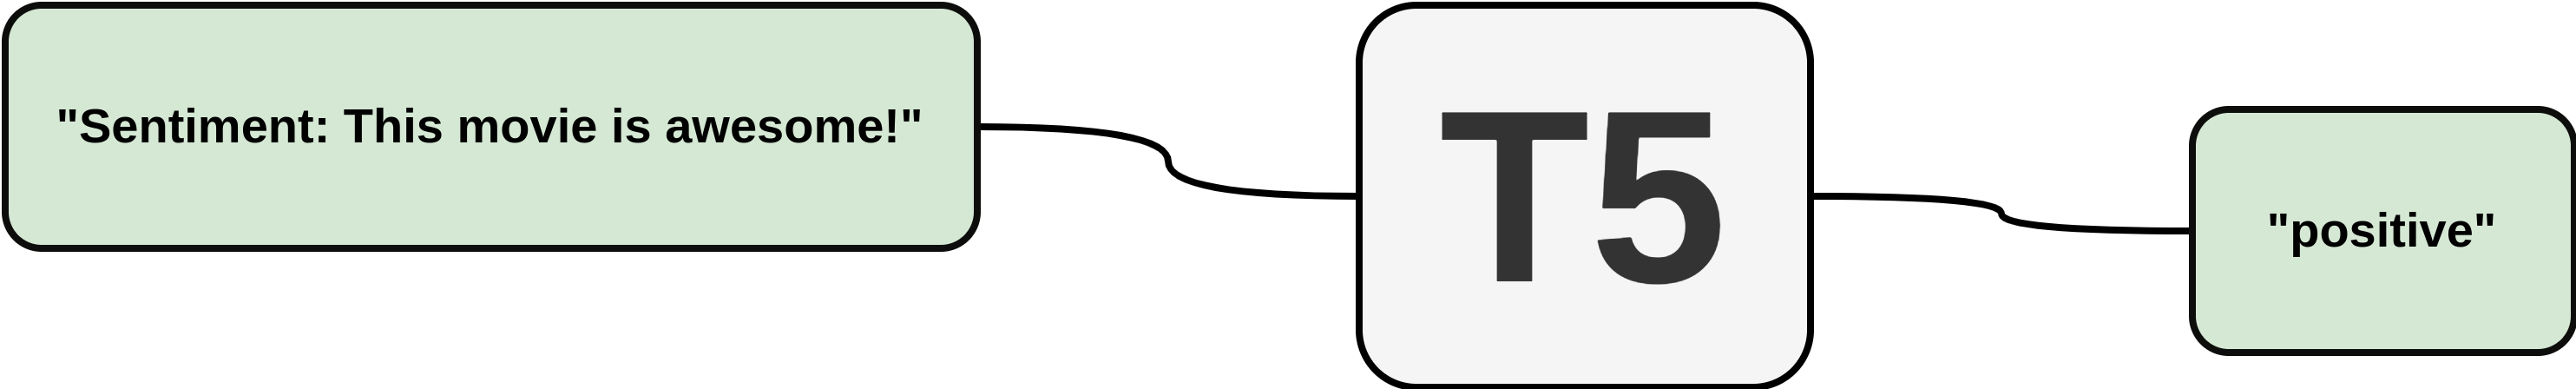

T5 is a powerful deep learning model pre-trained on massive amounts of text data. T5 is a type of transformer-based architecture that can generate outputs by taking input in the form of natural language text.

We can fine-tune a pre-trained T5 model on a labeled sentences dataset with their corresponding sentiment categories to use T5 for sentence classification. The fine-tuning process involves training the T5 model on our specific task by feeding it our labeled dataset and adjusting its parameters to improve its performance.

In this example, we use a T5 model that has already been fine-tuned on the Stanford Sentiment Treebank (SST-2). The model and the dataset are available online:

* [Model](https://huggingface.co/michelecafagna26/t5-base-finetuned-sst2-sentiment)
* [Dataset](https://huggingface.co/datasets/glue/viewer/sst2/test)








# Installing required packages

In this example, we have to install three libraries:  `transformers`, `datasets`, and `sentencepiece`, all from Hugging Face. [Hugging Face](https://huggingface.co/) is an AI startup that has gained significant traction in the NLP community recently. It provides a suite of open-source tools and libraries, making it easy for developers and researchers to work with state-of-the-art NLP models.

**`transformers`**:

Transformers is an open-source library for NLP developed by Hugging Face. It provides state-of-the-art pre-trained models for various NLP tasks, such as text classification, sentiment analysis, question-answering, named entity recognition, etc. The library is built on top of PyTorch and TensorFlow and provides easy-to-use interfaces to access pre-trained models and fine-tune them on specific tasks. The library also provides tools for training custom models and sharing them with the community.

**`datasets`**:

Datasets is another open-source library developed by Hugging Face that provides a collection of preprocessed datasets for various NLP tasks, such as sentiment analysis, natural language inference, machine translation, and many more. The library provides a unified API to access these datasets, making it easy to load, process, and analyze them.

**`sentencepiece`**:

Sentencepiece is an open-source library developed by Google for subword text processing. It is an unsupervised learning method that constructs a fixed-size vocabulary of subword units for a given language corpus. Sentencepiece enables the generation of a custom tokenization scheme that divides text into smaller subword units, which can better handle rare words and out-of-vocabulary words than traditional word-based tokenization.





In [1]:
!pip install -q transformers datasets sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 7.3 MB/s eta 0:00:00


# Setting the device

In this example, we will use a GPU to speed up the processing of our model. GPUs (Graphics Processing Units) are specialized processors that are optimized for performing large-scale computations in parallel. By using a GPU, we can accelerate the training and inference of a machine learning model, which can significantly reduce the time required to complete these tasks.

Before we begin, we need to check whether a GPU is available and select it as the default device for our PyTorch operations. This is because PyTorch can use either a CPU or a GPU to perform computations, and by default, it will use the CPU. 

For using a GPU in Google Colab: 
1. Click on the "Runtime" menu at the top of the screen.
2. From the dropdown menu, click on "Change runtime type".
3. In the popup window that appears, select "GPU" as the hardware accelerator.
4. Click on the "Save" button.

That's it! Now you can use the GPU for faster computations in your notebook. 

In [2]:
!nvidia-smi

Tue May  2 22:48:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch

if torch.cuda.is_available(): 
   dev = "cuda:0"
else: 
   dev = "cpu"
device = torch.device(dev)
print('Using {}'.format(device))

Using cuda:0


# Downloading Dataset

The SST-2 dataset, or the Stanford Sentiment Treebank, is popular for sentiment analysis tasks in Natural Language Processing (NLP). It consists of movie reviews from the Rotten Tomatoes website that are labeled with either a positive or negative sentiment. The dataset contains 10,662 sentence-level movie reviews, with approximately half of the reviews labeled as positive and the other half labeled as negative. The reviews are also relatively evenly distributed in length, with a median length of 18 tokens.

The SST-2 dataset has become a benchmark dataset for sentiment analysis in NLP, and many researchers use it to evaluate the performance of their models. The dataset's popularity is partly due to its high-quality labels and the task's relative simplicity, making it an accessible starting point for researchers and developers new to NLP.

In this example, we're using the **`datasets`** library to download and load the validation set of the dataset.

In the last two lines of code, we are preparing the dataset for evaluation. Firstly, we map the 'label' column to a new column named 'labels' using the **`map()`** method, which is required for evaluation. Then, we remove the 'label' column using the **`remove_columns()`** method to ensure that the validation set has only the input sequences and the associated labels that the model is supposed to predict during evaluation.

In [4]:
from datasets import load_dataset

test_dataset = load_dataset('glue', 'sst2', split='validation')

test_dataset = test_dataset.map(lambda example: {'labels': example['label']}, batched=True)
test_dataset = test_dataset.remove_columns(['label'])

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In this code, we use the **`pandas`** library to import the SST-2 dataset and show the first 10 examples using the **`df.head(10)`** method. The dataset contains examples labeled as either 0 or 1, representing negative and positive, respectively. For instance, the first example is labeled as 1, which means it is a positive example. It reads "it's a charming and often affecting journey," while the second example is labeled as 0, meaning it is a negative example. It reads "unflinchingly bleak and desperate." 
This way, you can have a quick overview of the dataset and its labeling.

In [5]:
import pandas as pd

df = pd.DataFrame(test_dataset)
df.head(10)

,sentence,idx,labels
0,it 's a charming and often affecting journey .,0,1
1,unflinchingly bleak and desperate,1,0
2,allows us to hope that nolan is poised to emba...,2,1
3,"the acting , costumes , music , cinematography...",3,1
4,"it 's slow -- very , very slow .",4,0
5,although laced with humor and a few fanciful t...,5,1
6,a sometimes tedious film .,6,0
7,or doing last year 's taxes with your ex-wife .,7,0
8,you do n't have to know about music to appreci...,8,1
9,"in exactly 89 minutes , most of which passed a...",9,0


# Downloading the model

We use the **`transformers`** library to load a sentiment analysis model using the T5 language model. The library provides two important classes for this task: **`T5Tokenizer`** and **`T5ForConditionalGeneration`**.

The **`T5Tokenizer`** class is used to tokenize input text data, which is essential for the T5 model to understand the meaning of the text. It is initialized with a pre-trained tokenizer, in this case "`t5-base`", trained on a large corpus of diverse text.

The **`T5ForConditionalGeneration`** class is used to load a pre-trained T5 model that has been fine-tuned for sequence classification. In this example, we use a model that has been fine-tuned on the SST-2 dataset for sentiment analysis, available through the "`michelecafagna26/t5-base-finetuned-sst2-sentiment`" identifier. This pre-trained model can classify input text into two sentiment categories: positive or negative.

**`model.to(device)`** moves the model's parameters and computation to the device specified by the device variable. In this case, device represents either the CPU or the GPU, depending on the availability of the GPU on the system. By moving the model to the device, we can perform the computations required for training or inference on that device, which can greatly improve the speed of the processing.

In [6]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("michelecafagna26/t5-base-finetuned-sst2-sentiment")

model.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

# Model Evaluation

## Data Preparation

The code below is mapping the **`test_dataset`** by adding the "sentiment: " string to the beginning of each sentence using a lambda function. This is done to make sure that the fine-tuned T5 model can recognize and classify the sentiment in the sentence correctly. The fine-tuned T5 model was trained on input examples that were preprocessed with the same prefix, so the prefix must be added to new input sentences for the model to produce accurate results.



In [7]:
test_dataset = test_dataset.map(lambda example: {'sentence': "sentiment: " + example['sentence']})

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

The code below prepares the data for input into the T5 model during the evaluation phase. The function **`prepare_data()`** takes an item as input and tokenizes its 'sentence' and converts its 'labels' into the expected output format. The **`tokenizer()`** function tokenizes the input sentence by truncating it to a maximum length of **`MAX_LENGTH`** and padding it to the same length using **`padding='max_length'`**. 

The **`prepare_data()`** function is applied to each item in the test dataset using the **`map()`** method, which maps the function to each element in the dataset. The **`batched=True`** parameter specifies that the **`map()`** method should process the data in batches. The resulting tokenized dataset is then used to create a dataloader in batches for the evaluation phase.

In [8]:
MAX_LENGTH = 128 #  maximum length of the tokenized sentences

POSITIVE_LABEL = "p"
NEGATIVE_LABEL = "n"

def prepare_data(item):
  model_inputs = tokenizer(item['sentence'], truncation=True, padding='max_length', max_length=MAX_LENGTH)
  model_inputs["labels"] = [POSITIVE_LABEL if label == 1 else NEGATIVE_LABEL for label in item['labels']]
  return model_inputs

test_dataset = test_dataset.map(lambda e: prepare_data(e), batched=True)

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

The **`set_format()`** method is called on the dataset object to convert the dataset to a PyTorch tensor, which is required by the T5 model used in this example.

The columns argument specifies which columns in the dataset should be included in a PyTorch tensor. In this case, the **`input_ids`**, **`attention_mask`**, and **`labels`** columns are included. These columns correspond to the inputs and labels that the T5 model expects for sequence classification tasks.

In [9]:
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', "labels"])

Each example of the dataset consists of a dictionary with the following keys:

**`input_ids`**: The tokenized and encoded input sequence. The length of this sequence is padded to **`MAX_SOURCE_LENGTH`**, and any shorter sequences are zero-padded at the end.

**`attention_mask`**: A binary mask indicating which tokens in the **`input_ids`** sequence should be attended to and which should not. Any padding tokens have a corresponding 0 in the **`attention_mask`**, while all other tokens have a 1.

**`labels`**: A string that represents the label of the input sequence. In the example, the label is **p** (positive). In this example, the labels are not input to the model. However, they are important to compare with the model's predictions.

In [10]:
test_dataset[0]

{'labels': 'p',
 'input_ids': tensor([ 6493,    10,    34,     3,    31,     7,     3,     9, 12216,    11,
           557,     3, 13403,  2027,     3,     5,     1,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0, 

We use the PyTorch's **`DataLoader`** class to create a data loader for evaluating a machine learning model on a test dataset. The data loader will load the test dataset in batches of 256 samples at a time.

The **`DataLoader`** class is a PyTorch utility that helps you efficiently load and preprocess data in batches from a dataset.

The **`batch_size`** parameter specifies the number of samples to load in each batch. Loading data in batches is important because it allows you to efficiently use the memory of your machine learning system. When you have a large dataset that doesn't fit into the memory of your system, loading the entire dataset at once would cause an out of memory error.

In [11]:
from torch.utils.data import DataLoader
eval_dataloader = DataLoader(test_dataset, batch_size=256)

# Inference

In the inference stage of the evaluation, we make predictions on the test dataset using the fine-tuned model.

To compute accuracy, we need to define a custom **`string_accuracy`** function since the T5 model outputs text rather than numerical values. Therefore, we cannot use the built-in accuracy function directly, which expects numerical values as inputs.

The following code defines the **`string_accuracy`** function. It takes two lists of strings as inputs, **`predictions`** and **`references`**. The function computes accuracy by counting the number of predictions that match the corresponding reference and dividing by the total number of predictions.

In [12]:
def string_accuracy(predictions, references):
    correct = sum([1 for p, r in zip(predictions, references) if p.lower() == r.lower()])
    total = len(predictions)
    return correct / total

The following code performs the inference stage of the evaluation using a fine-tuned T5 transformer model to make predictions on a test dataset. The code computes the accuracy of the model using the metric defined in the previous cell. 

First, the code initializes variables to keep track of the total correct predictions and total predictions. Then, it loops through each batch in the evaluation dataloader and extracts the inputs and labels from the batch. We move the **`input_ids`** and the **`attention_mask`** tensors to the GPU to put them in the same device of the model. The code generates predictions for the batch using the fine-tuned T5 model and the **`generate()`** function of PyTorch. 

Next, the code uses the **`batch_decode()`** function of the tokenizer to convert the tokenized output of the T5 model into plain text, and then it computes the accuracy for the batch using the **`string_accuracy`** function defined earlier. The batch accuracy is then added to the total correct predictions, and the total number of predictions is updated.

After looping through all batches, the code computes the overall accuracy for the evaluation dataset by dividing the total correct predictions by the total number of predictions. Finally, the code prints the overall accuracy.

In [13]:
import torch
from tqdm import tqdm

# Initialize variables to keep track of total correct predictions and total predictions
total_correct = 0
total_predictions = 0

# Loop through each batch in the evaluation dataloader
for batch in tqdm(eval_dataloader):
    # Extract the inputs and labels from the batch
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"]
    
    # Generate predictions for the batch
    with torch.no_grad():
        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)
    predictions = tokenizer.batch_decode(sequences=outputs, skip_special_tokens=True)
    
    # Compute the accuracy for the batch using the string_accuracy function
    batch_correct = string_accuracy(predictions=predictions, references=labels)
    
    # Update the total correct predictions and total predictions
    total_correct += batch_correct * len(predictions)
    total_predictions += len(predictions)

# Compute the overall accuracy for the evaluation dataset
overall_accuracy = total_correct / total_predictions
print()
print("Overall Accuracy:", overall_accuracy)

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
 25%|██▌       | 1/4 [00:11<00:33, 11.30s/it]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
100%|██████████| 4/4 [00:16<00:00,  4.23s/it]


Overall Accuracy: 0.9495412844036697


# Try it yourself

You can try sentiment analysis with your own sentences by providing the input text as a string to the **`text`** variable in the code snippet provided below.

The code defines a function **`get_sentiment`** that takes a string **`text`** as input. The **`text`** variable should be provided with a sentence or a text fragment for which sentiment analysis needs to be performed. The function first tokenizes the input text by adding a "**sentiment:**" string at the beginning of the input text and then tokenizing it with the tokenizer. The maximum length of the tokenized sentence is set to 128. Then the tokenized inputs are passed to the **`model.generate`** function, which returns the predicted sentiment labels in a tensor format. These tensor labels are decoded using the tokenizer's **`batch_decode`** function to get the predicted labels in a human-readable format. The function returns "**positive**" if the predicted sentiment is positive (i.e., **`decoded_preds == POSITIVE_LABEL`**), otherwise it returns "**negative**".

In [14]:
def get_sentiment(text):
    inputs = tokenizer("sentiment: " + text, max_length=128, truncation=True, return_tensors="pt").input_ids
    preds = model.generate(inputs.to(device)) # notice that the input is moved to the device (GPU)
    decoded_preds = tokenizer.batch_decode(sequences=preds, skip_special_tokens=True)[0]
    return "positive" if decoded_preds == POSITIVE_LABEL else "negative"
text = "This movie is awesome!" # @param
class_label = get_sentiment(text)
print(f"The sentence '{text}' is classified as '{class_label}'.")

The sentence 'This movie is awesome!' is classified as 'positive'.
